* Variable	Definition	Key
* survival	Survival	0 = No, 1 = Yes
* pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
    * 1st = Upper
    * 2nd = Middle
    * 3rd = Lower
* sex	Sex	
* Age	Age in years	
* sibsp	# of siblings(兄弟) / spouses（配偶者） aboard the Titanic	
* parch	# of parents（親） / children（子供） aboard the Titanic	
* ticket	Ticket number	
* fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
#テスト
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgb
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.metrics import accuracy_score


import os

In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [3]:
full_data = [train, test]
full_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

### データの確認

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* survived mean p = 0.38
* age mean と medianが近い→正規分布？
* fare mean = 32 ,median = 14,4　数値に開きがある→分布も偏りがあるのではないか？

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.shape,test.shape

((891, 12), (418, 11))

In [10]:
# train.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
train.drop(["PassengerId", "Name", "Ticket", 'Cabin'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
# test.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
test.drop(["PassengerId", "Name", "Ticket", 'Cabin'], axis=1, inplace=True)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


#### ID:2

In [12]:
from sklearn.preprocessing import LabelEncoder
  
# 性別の数値化
sex_le = LabelEncoder()
train['Sex'] = sex_le.fit_transform(train['Sex'])
test['Sex'] = sex_le.fit_transform(test['Sex'])
 
# 出港地の数値化
town_le = LabelEncoder()
train['Embarked'] = town_le.fit_transform(train['Embarked'])
test['Embarked'] = town_le.fit_transform(test['Embarked'])

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### EDA(探索的データ分析)

#### ID:1 データの可視化

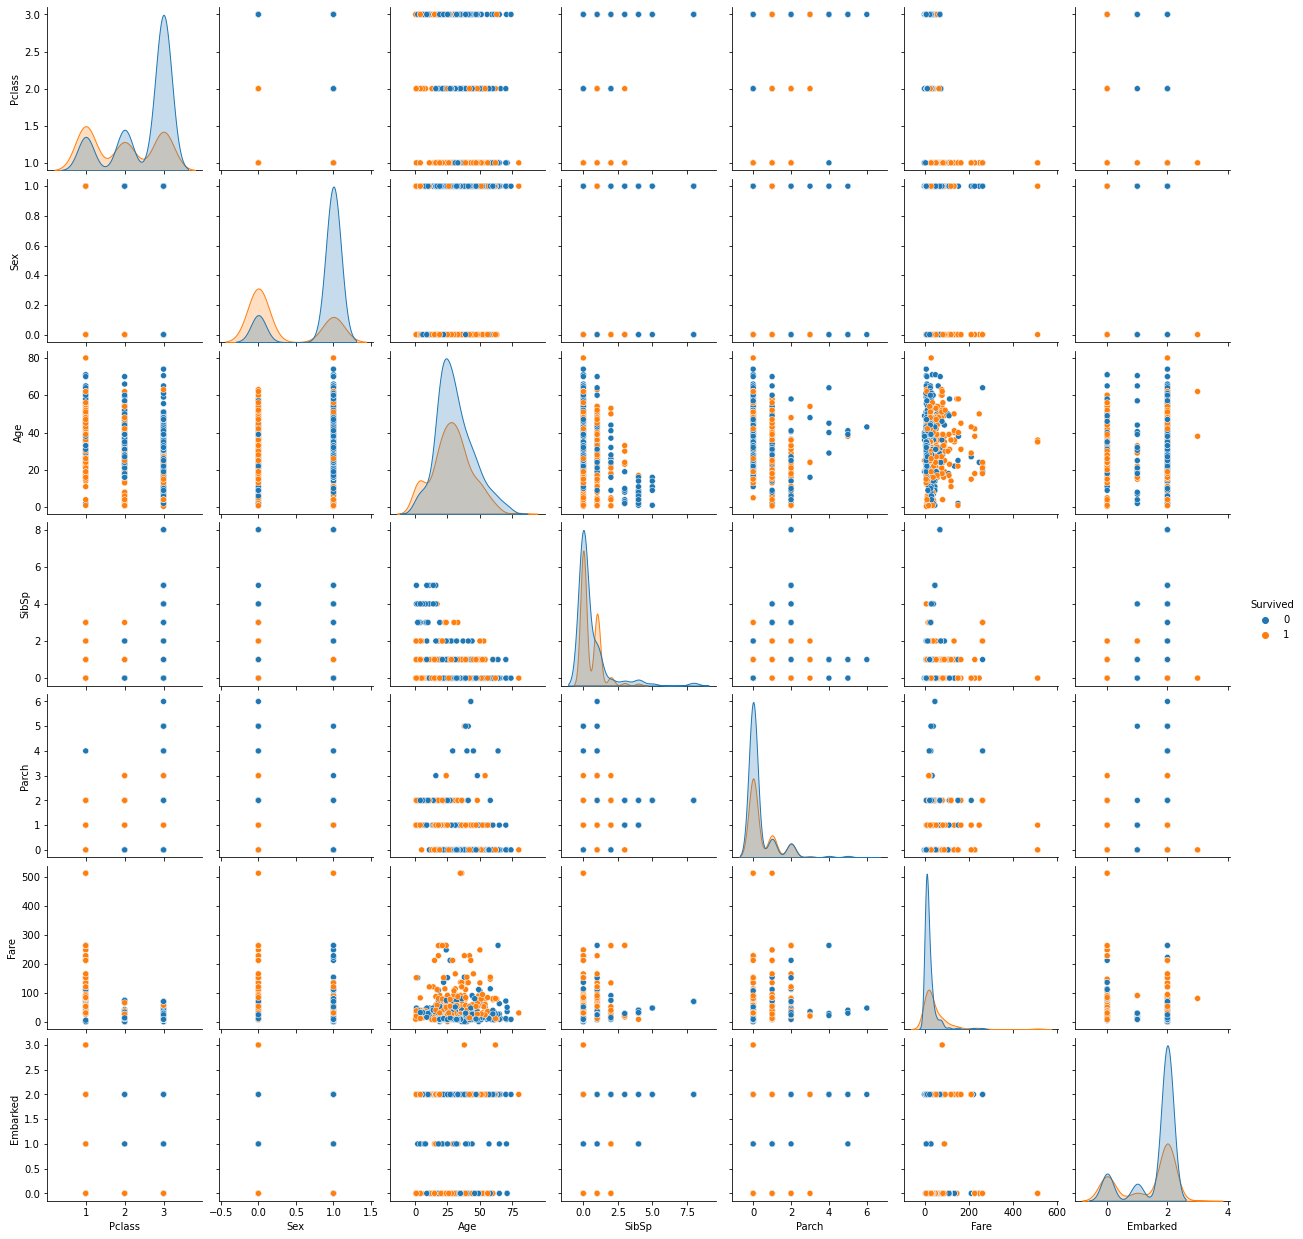

In [13]:
sns.pairplot(train, hue= 'Survived')
plt.show()

* ageは正規分布に従う
* surviede=1に小さな山がある→年少者を生かした可能性
* sibsp,parch,Fareは歪度がマイナス、左によっている。
* →Fareは対数変換して正規分布に近づけて使用していいかも
*　女性の方が生き残りやすいが、料金が低いと死亡率が上がる

In [14]:
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.025252
SibSp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.157112,0.104057,-0.025252,0.066654,0.038322,-0.221226,1.000000


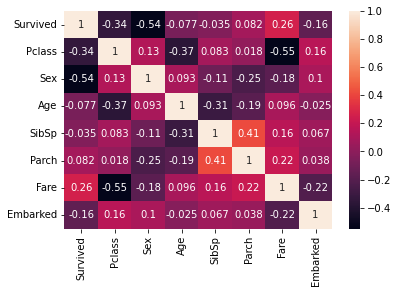

In [15]:
#ピアソン積率相関
sns.heatmap(train.corr(), annot=True)
plt.show()

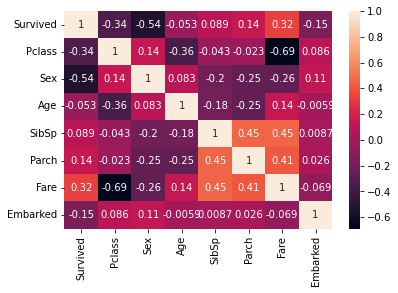

In [16]:
#スピアマン順位相関
sns.heatmap(train.corr(method='spearman'),annot=True)
plt.show()

In [17]:
#クラメール（質的✖️質的）
def CorrelationV(x, y):
    """
    Calc Correlation ratio 

    Parameters
    ----------
    x : nominal scale {numpy.ndarray, pandas.Series}
    y : ratio   scale {numpy.ndarray, pandas.Series}
    """
    variation = ((y - y.mean()) ** 2).sum()
    inter_class = sum([((y[x == i] - y[x == i].mean()) ** 2).sum() for i in np.unique(x)])
    correlation_ratio = inter_class / variation
    return 1 - correlation_ratio

In [18]:
CorrelationV(train['Survived'], train['Sex'])

0.2952307228626886

In [19]:
x = np.array([])
for i in ['Survived', 'Pclass', 'Sex']:
    for j in ['Survived', 'Pclass', 'Sex']:
        x = np.append(x,CorrelationV(train[i], train[j]))
print(x)

[1.         0.11456941 0.29523072 0.11547586 1.         0.0190477
 0.29523072 0.01739774 1.        ]


### 男女比が異なる場合、ピアソン、クラメールの相関と相関比が異なる。

### ID:10 (standardscalar) スコア上がらず

In [20]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# train['Fare'] = ss.fit_transform(train['Fare'].values.reshape(-1,1))
# test['Fare'] = ss.fit_transform(test['Fare'].values.reshape(-1,1))

### ID:4　対数処理

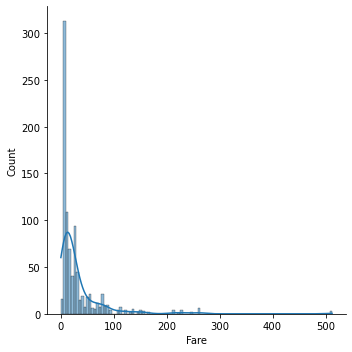

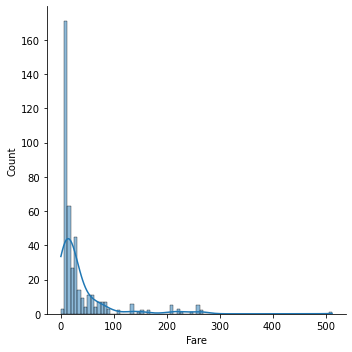

In [21]:
sns.displot(train['Fare'], kde=True)
sns.displot(test['Fare'], kde=True)
plt.show()

In [22]:
train['Fare'] = np.log(train['Fare'])
test['Fare'] = np.log(test['Fare'])
train.head()

/Users/terasawayasuto/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,1.981001,2
1,1,1,0,38.0,1,0,4.266662,0
2,1,3,0,26.0,0,0,2.070022,2
3,1,1,0,35.0,1,0,3.972177,2
4,0,3,1,35.0,0,0,2.085672,2


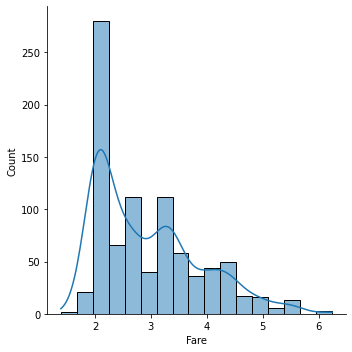

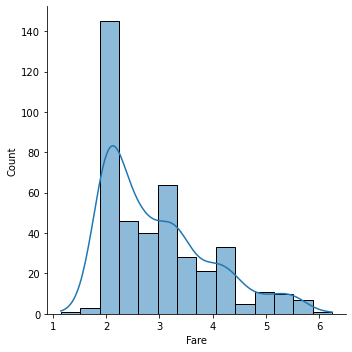

In [23]:
sns.displot(train['Fare'], kde=True)
sns.displot(test['Fare'], kde=True)
plt.show()

#### ID:12 各変数のカテゴリーごとの生存率

##### 1.Pclass

In [24]:
print(train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


* Pclassが高いほど生存率が高い

##### 2.Sex

In [25]:
print(train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean())

   Sex  Survived
0    0  0.742038
1    1  0.188908


In [26]:
print(train[['Sex','Survived']].groupby(['Survived'], as_index=False).mean())

   Survived       Sex
0         0  0.852459
1         1  0.318713


* 女性の生存率が高い
* 女性の割合が元々低いのではないか

In [27]:
train['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

* そこまで大きな差はない

##### 3.Sibsp and Parch

In [28]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print(train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


* 女性で家族持ちは生存率が高いのではないか

In [29]:
train[['FamilySize','Sex','Survived','Parch','Age']].groupby(['Sex','FamilySize','Parch'], as_index=True).mean()

Survived        Age
Sex FamilySize Parch                     
0   1          0      0.785714  30.150000
    2          0      0.793651  31.806122
               1      0.875000  27.086957
    3          0      0.666667  35.500000
               1      0.769231  29.160000
               2      0.800000  20.705882
    4          0      1.000000  31.500000
               1      1.000000   6.900000
               2      0.727273  21.200000
               3      1.000000  24.000000
    5          1      0.000000   5.500000
               2      0.500000  17.250000
               3      0.500000  51.000000
               4      0.000000  29.000000
    6          2      0.500000  14.500000
               3      1.000000  24.000000
               4      0.000000  45.000000
               5      0.000000  40.000000
    7          2      0.333333   8.333333
               5      0.500000  38.500000
    8          2      0.000000  16.000000
               6      0.000000  43.000000
    11         2      0.000000        NaN
1   1          0      0.155718  32.901316
    2          0      0.233333  32.311321
               1      0.285714  33.530000
    3          0      0.153846  31.181818
               1      0.451613  25.258621
               2      0.555556  21.536667
    4          1      0.500000  12.000000
               2      0.500000  19.417143
    5          1      0.000000   2.000000
               3      0.000000  16.000000
    6          1      0.000000   6.777778
               2      0.000000  11.000000
               4      0.000000  52.000000
    7          2      0.333333   5.333333
               5      0.000000  39.000000
    8          2      0.000000   8.750000
    11         2      0.000000        NaN

* 女性でも家族が多いと死亡している
* FamilySizeが多くても、parchが０だと死亡率が高い。
* 独身者・既婚者フラグを立てられそう

#### 独身者フラグ

In [30]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['Parch'] == 0, 'IsAlone'] = 1
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.511737
1        1  0.343658


## Dataの準備

In [31]:
label = train["Survived"]
train.drop(["Survived"], axis=1, inplace=True)

In [32]:
print(train.shape, test.shape)
train.dtypes

(891, 9) (418, 9)


Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked        int64
FamilySize      int64
IsAlone         int64
dtype: object

In [33]:
#category変数のdtypeをcategotyに変換
# cat_feat = ["Pclass", "Sex", "Cabin", "Embarked"]
cat_feat = ["Pclass", "Sex", "Embarked",'IsAlone']
for i in cat_feat :
    train[i] = train[i].astype("category")
    test[i] = test[i].astype("category")

In [34]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,1,22.0,1,0,1.981001,2,2,1
1,1,0,38.0,1,0,4.266662,0,2,1
2,3,0,26.0,0,0,2.070022,2,1,1
3,1,0,35.0,1,0,3.972177,2,2,1
4,3,1,35.0,0,0,2.085672,2,1,1


In [35]:
train.shape
train.dtypes

Pclass        category
Sex           category
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked      category
FamilySize       int64
IsAlone       category
dtype: object

In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(train, label)

NameError: name 'train_test_split' is not defined

In [37]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=cat_feat)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train, categorical_feature=cat_feat)

params = {
    "objective" : "binary",
    'learning_rate': 0.01,
    "metric" : "binary_logloss",
    "early_stopping_round" : 20
}

NameError: name 'X_train' is not defined

In [91]:
model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_eval])

[LightGBM] [Info] Number of positive: 262, number of negative: 406
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 220
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.392216 -> initscore=-0.438009
[LightGBM] [Info] Start training from score -0.438009
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's binary_logloss: 0.664715	valid_1's binary_logloss: 0.650679
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's binary_logloss: 0.659811	valid_1's binary_logloss: 0.646391
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	trainin

/Users/terasawayasuto/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/Users/terasawayasuto/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/terasawayasuto/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


In [92]:
val_pred = model.predict(X_valid, num_iteration=model.best_iteration)

In [93]:
val_pred = np.where(val_pred < 0.5, 0, 1)
acc = accuracy_score(y_valid, val_pred)
acc

0.8116591928251121

In [94]:
cols = list(train.columns)
f_importance = model.feature_importance()
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
print('特徴量の重要度')
display(df_importance)

特徴量の重要度


,feature,importance
2,Age,954
5,Fare,733
0,Pclass,182
6,Embarked,171
1,Sex,100
3,SibSp,50
7,FamilySize,41
4,Parch,37
8,IsAlone,0


In [95]:
test_pred = model.predict(test, num_iteration=model.best_iteration)
test_pred = np.where(test_pred < 0.5, 0, 1)

In [96]:
sub = pd.read_csv("./gender_submission.csv")

In [97]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [98]:
sub["Survived"] = test_pred
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [100]:
sub.to_csv("../titanic_submission/submission_id2_8.csv", index=False)